In [218]:
!pip install scipy 
!pip install sklearn

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
%matplotlib inline


In [187]:
import sklearn
sklearn.__version__

'0.21.1'

In [231]:
# concatenate data

path="/Users/jakob/Dokumente/Schule/Jahresarbeit/Projekte/ParticulateMatterAnalysis/data/StuttgartCsvDone/"

df = pd.read_csv(path + "Halbstd-Werte-Stuttgart-Mitte-SZ_2018_D.csv", index_col=[0], sep = ";")


for y in range(2018,1996,-1):
    if y == 2000 or y == 2001:
        continue
    
    print ("year:%d" %y)
    df2 = pd.read_csv(path + "Halbstd-Werte-Stuttgart-Mitte-SZ_%s_D.csv" % (str(y)), index_col=[0], sep = ";")
    print(list(set(list(df.columns)) - set(list(df2.columns))))
    df = pd.concat([df,df2])
    print("len:%d" %len(df))
    



year:2018
[]
len:35040
year:2017
[]
len:52560
year:2016
[]
len:70128
year:2015
[]
len:87648
year:2014
[]
len:105168
year:2013
['PM2.5 (µg/m³)-Mittel']
len:122688
year:2012
['PM2.5 (µg/m³)-Mittel']


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


len:140256
year:2011
['PM2.5 (µg/m³)-Mittel']
len:157776
year:2010
['PM2.5 (µg/m³)-Mittel']
len:175296
year:2009
['PM2.5 (µg/m³)-Mittel']
len:192816
year:2008
['PM2.5 (µg/m³)-Mittel']
len:210384
year:2007
['PM2.5 (µg/m³)-Mittel']
len:227904
year:2006
['PM2.5 (µg/m³)-Mittel']
len:245424
year:2005
['PM2.5 (µg/m³)-Mittel']
len:262944
year:2004
['PM2.5 (µg/m³)-Mittel']
len:280512
year:2003
['PM2.5 (µg/m³)-Mittel']
len:298032
year:2002
['PM2.5 (µg/m³)-Mittel']
len:315552
year:1999
['UVA-Str. (W/m²)-Mittel', 'UVB-Str. (W/m²)-Mittel', 'Str.-Bilanz (W/m²)-Mittel', 'PM2.5 (µg/m³)-Mittel']
len:333072
year:1998
['UVA-Str. (W/m²)-Mittel', 'UVB-Str. (W/m²)-Mittel', 'Str.-Bilanz (W/m²)-Mittel', 'PM2.5 (µg/m³)-Mittel']
len:350592
year:1997
['UVA-Str. (W/m²)-Mittel', 'UVB-Str. (W/m²)-Mittel', 'Str.-Bilanz (W/m²)-Mittel', 'PM2.5 (µg/m³)-Mittel']
len:368112


In [212]:
#remove columns which are not in all the data files

In [213]:
set(df.columns)

{'Druck (hPa)-Mittel',
 'Feuchte (%)-Mittel',
 'Globalstr. (W/m²)-Mittel',
 'NO (µg/m³)-Mittel',
 'NO2 (µg/m³)-Mittel',
 'Niederschlag (l/m²)-Summe',
 'O3 (µg/m³)-Mittel',
 'PM10 (µg/m³)-Mittel',
 'PM2.5 (µg/m³)-Mittel',
 'Str.-Bilanz (W/m²)-Mittel',
 'Temp. (°C)-Max',
 'Temp. (°C)-Min',
 'Temp. (°C)-Mittel',
 'UVA-Str. (W/m²)-Mittel',
 'UVB-Str. (W/m²)-Mittel',
 'Uhrzeit-',
 'WG (m/s)-Max',
 'WG (m/s)-Mittel',
 'WR (Grad)-Mittel'}

In [214]:
list(set(list(df.columns)) - set(list(df2.columns)))


[]

In [215]:
a = ["a", "b", "c"]
b = ["a", "b"]
list(set(a) - set(b))

['c']

In [7]:
dfx = df.convert_objects(convert_numeric=True)
dfx.dtypes

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


Uhrzeit-                      object
Temp. (°C)-Mittel            float64
Temp. (°C)-Max               float64
Temp. (°C)-Min               float64
Feuchte (%)-Mittel           float64
WG (m/s)-Mittel              float64
WG (m/s)-Max                 float64
WR (Grad)-Mittel             float64
Druck (hPa)-Mittel           float64
Niederschlag (l/m²)-Summe    float64
Globalstr. (W/m²)-Mittel     float64
Str.-Bilanz (W/m²)-Mittel    float64
UVA-Str. (W/m²)-Mittel       float64
UVB-Str. (W/m²)-Mittel       float64
NO (µg/m³)-Mittel            float64
NO2 (µg/m³)-Mittel           float64
O3 (µg/m³)-Mittel            float64
PM10 (µg/m³)-Mittel          float64
PM2.5 (µg/m³)-Mittel         float64
dtype: object

In [8]:
df1 = dfx[['Temp. (°C)-Mittel', 'Temp. (°C)-Max', 'Temp. (°C)-Min',
       'Feuchte (%)-Mittel', 'WG (m/s)-Mittel', 'WG (m/s)-Max',
       'WR (Grad)-Mittel', 'Druck (hPa)-Mittel', 'Niederschlag (l/m²)-Summe',
       'Globalstr. (W/m²)-Mittel', 'Str.-Bilanz (W/m²)-Mittel',
       'UVA-Str. (W/m²)-Mittel', 'UVB-Str. (W/m²)-Mittel', 'NO (µg/m³)-Mittel',
       'NO2 (µg/m³)-Mittel', 'O3 (µg/m³)-Mittel', 'PM10 (µg/m³)-Mittel',
       'PM2.5 (µg/m³)-Mittel']]
df1.dtypes

Temp. (°C)-Mittel            float64
Temp. (°C)-Max               float64
Temp. (°C)-Min               float64
Feuchte (%)-Mittel           float64
WG (m/s)-Mittel              float64
WG (m/s)-Max                 float64
WR (Grad)-Mittel             float64
Druck (hPa)-Mittel           float64
Niederschlag (l/m²)-Summe    float64
Globalstr. (W/m²)-Mittel     float64
Str.-Bilanz (W/m²)-Mittel    float64
UVA-Str. (W/m²)-Mittel       float64
UVB-Str. (W/m²)-Mittel       float64
NO (µg/m³)-Mittel            float64
NO2 (µg/m³)-Mittel           float64
O3 (µg/m³)-Mittel            float64
PM10 (µg/m³)-Mittel          float64
PM2.5 (µg/m³)-Mittel         float64
dtype: object

In [47]:
df1 = df1.dropna()
print(df2)

                     Temp. (°C)-Mittel  Temp. (°C)-Max  Temp. (°C)-Min  \
Datum-                                                                   
2018-01-01 02:30:00                9.6             9.7             9.4   
2018-01-01 03:30:00                8.9             9.2             8.8   
2018-01-01 04:00:00                8.8             8.9             8.7   
2018-01-01 05:00:00                8.7             8.8             8.7   
2018-01-01 05:30:00                8.7             8.7             8.7   
2018-01-01 07:00:00                8.4             8.5             8.1   
2018-01-01 07:30:00                7.7             8.1             7.2   
2018-01-01 08:00:00                7.2             7.2             7.1   
2018-01-01 08:30:00                7.1             7.2             7.1   
2018-01-01 09:30:00                7.0             7.1             6.9   
2018-01-01 10:00:00                7.4             7.7             7.0   
2018-01-01 10:30:00                7.7

In [ ]:
df1.mean()

In [ ]:
stats.zscore(df1)

In [ ]:
#df1 = df1[pd.to_numeric(df1["PM2.5 (µg/m³)-Mittel"], errors='coerce').notnull()]

In [10]:
df1 = df1[pd.to_numeric(df1["PM10 (µg/m³)-Mittel"], errors='coerce').notnull()]

In [11]:
df1.isnull().values.any()

False

In [12]:
#plt.scatter(df1["Temp. (°C)-Mittel"], df1["PM2.5 (µg/m³)-Mittel"])

In [13]:
df1.describe()

,Temp. (°C)-Mittel,Temp. (°C)-Max,Temp. (°C)-Min,Feuchte (%)-Mittel,WG (m/s)-Mittel,WG (m/s)-Max,WR (Grad)-Mittel,Druck (hPa)-Mittel,Niederschlag (l/m²)-Summe,Globalstr. (W/m²)-Mittel,Str.-Bilanz (W/m²)-Mittel,UVA-Str. (W/m²)-Mittel,UVB-Str. (W/m²)-Mittel,NO (µg/m³)-Mittel,NO2 (µg/m³)-Mittel,O3 (µg/m³)-Mittel,PM10 (µg/m³)-Mittel,PM2.5 (µg/m³)-Mittel
count,12801.000000,12801.000000,12801.000000,12801.000000,12801.000000,12801.000000,12801.000000,12801.000000,12801.000000,12801.000000,12801.000000,12801.000000,12801.000000,12801.000000,12801.000000,12801.000000,12801.000000,12801.000000
mean,12.468299,12.794469,12.176877,67.677002,1.419053,2.542137,178.616757,985.058245,0.020951,103.535036,28.795805,5.671680,0.117733,13.111835,29.355105,17.781267,19.180572,15.547465
std,8.593478,8.692151,8.508615,16.246273,0.834992,1.322667,94.304797,7.480577,0.167454,178.112028,144.241913,6.935529,0.178274,22.773027,16.079006,11.869397,13.862695,11.679232
min,-10.000000,-9.600000,-10.400000,19.100000,0.000000,0.200000,0.100000,953.700000,0.000000,0.000000,-196.900000,0.820000,0.022000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.700000,6.000000,5.500000,57.000000,0.900000,1.600000,83.900000,981.300000,0.000000,0.000000,-57.800000,1.490000,0.029000,1.000000,17.400000,7.000000,10.800000,8.800000
50%,11.900000,12.000000,11.700000,70.900000,1.300000,2.200000,211.100000,985.200000,0.000000,0.100000,-23.800000,2.320000,0.045000,4.100000,27.300000,16.600000,16.300000,13.300000
75%,19.000000,19.400000,18.700000,80.700000,1.800000,3.100000,233.800000,989.400000,0.000000,131.200000,44.600000,6.810000,0.099000,14.800000,39.400000,26.000000,24.400000,19.500000
max,35.600000,36.400000,35.100000,97.300000,9.200000,14.800000,359.700000,1005.900000,7.700000,825.000000,688.300000,35.490000,1.084000,257.600000,113.400000,75.000000,483.300000,419.200000


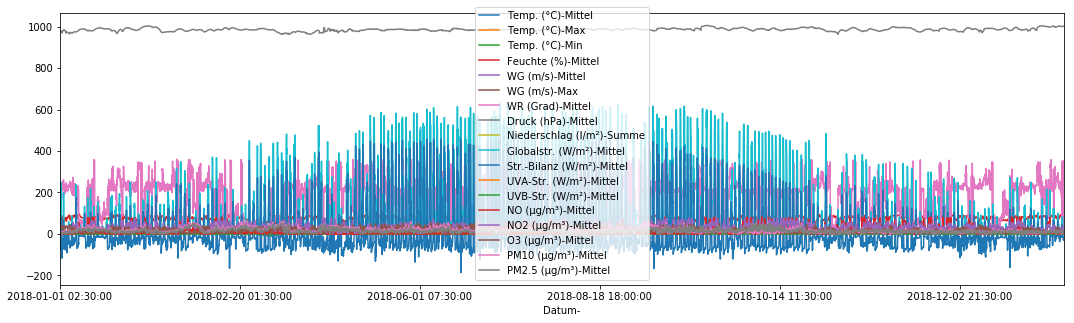

In [14]:
std_dev = 3
df2 = df1[(np.abs(stats.zscore(df1)) < float(std_dev)).all(axis=1)]
df2.plot(figsize=(18,5))

In [15]:
df.apply(lambda x:x.str.isalpha()).values.any()

False

In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

import sys

X = pd.DataFrame(df1[['Temp. (°C)-Mittel', 'Temp. (°C)-Max', 'Temp. (°C)-Min',
       'Feuchte (%)-Mittel', 'WG (m/s)-Mittel', 'WG (m/s)-Max',
       'WR (Grad)-Mittel', 'Druck (hPa)-Mittel', 'Niederschlag (l/m²)-Summe',
       'Globalstr. (W/m²)-Mittel', 'Str.-Bilanz (W/m²)-Mittel']])
y = pd.DataFrame(df1['PM10 (µg/m³)-Mittel'])
#methods = [GaussianProcessRegressor(),RadiusNeighborsRegressor, KNeighborsRegressor(), SGDRegressor(), KernelRidge(alpha=0.7), SVR(gamma='auto'), LinearRegression(), Ridge(alpha=.1)]
methods = [HistGradientBoostingRegressor(max_iter=5000), HistGradientBoostingRegressor()]
for model in methods:
    sys.stdout.write(type(model).__name__ +": ")
    scores = []
    kfold = KFold(n_splits=3, shuffle=True, random_state=42)
    for i, (train, test) in enumerate(kfold.split(X, y)):
      sys.stdout.write(".")
      model.fit(X.iloc[train,:], y.iloc[train,:].values.ravel())
      #print(model.get_params())
      score = model.score(X.iloc[test,:], y.iloc[test,:].values.ravel())
      scores.append(score)

    print(scores)

HistGradientBoostingRegressor: ...[0.5655481510779989, 0.5765501360858927, 0.48137659233101987]
HistGradientBoostingRegressor: ...[0.5473557335758121, 0.5949963865790253, 0.42536592295312414]


In [51]:
len(pd.DataFrame(df1[['Feuchte (%)-Mittel']]))

12801

In [53]:
len(pd.DataFrame(df1[['PM10 (µg/m³)-Mittel']]))

12801

In [140]:
x = pd.DataFrame(df1[['Temp. (°C)-Mittel']])
#y = pd.DataFrame(df1['Feuchte (%)-Mittel'])
y = pd.DataFrame(df1['PM10 (µg/m³)-Mittel'])
clf = svm.SVR(gamma='auto')
clf.fit(x, y.values.ravel()) 
temp0= np.arange(-10,40)
temp = []
for i in range(len(temp0)):
    temp.append([temp0[i]])
feucht = clf.predict(temp)


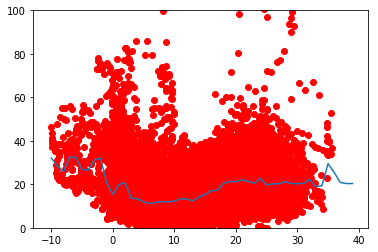

In [141]:
plt.plot(temp0, feucht)
plt.scatter(x,y, color = 'red')
axes = plt.gca()
axes.set_ylim([0,100])
plt.show()

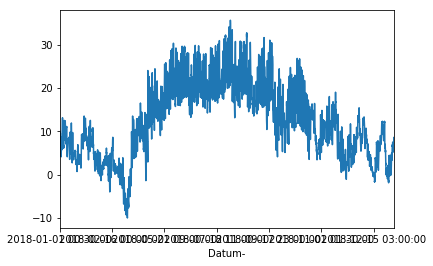

In [135]:
df1['Temp. (°C)-Mittel'].plot()

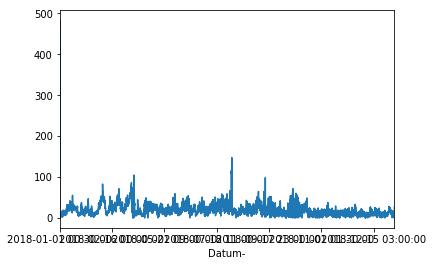

In [136]:
df1['PM10 (µg/m³)-Mittel'].plot()

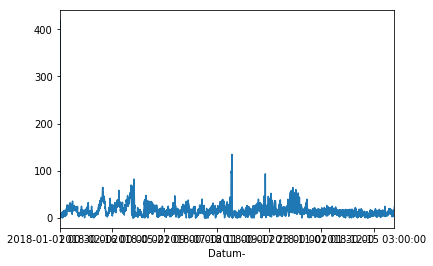

In [137]:
df1['PM2.5 (µg/m³)-Mittel'].plot()

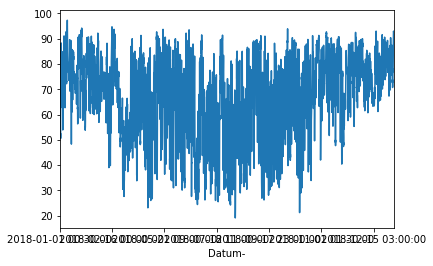

In [90]:
df1['Feuchte (%)-Mittel'].plot()

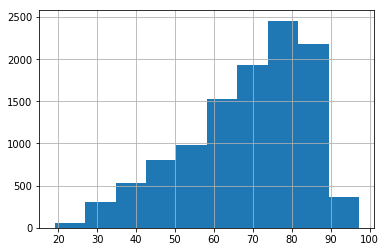

In [80]:
df2['Feuchte (%)-Mittel'].hist()

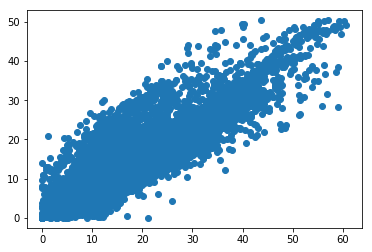

In [92]:
plt.scatter(df2['PM10 (µg/m³)-Mittel'] , df2['PM2.5 (µg/m³)-Mittel'])

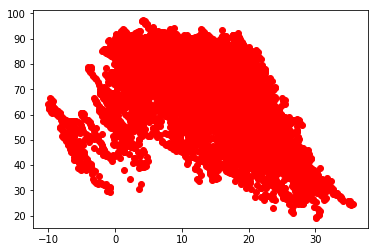

In [94]:
plt.scatter(df2['Temp. (°C)-Mittel'], df2[ 'Feuchte (%)-Mittel'], color = 'red')
#plt.scatter(df2['Temp. (°C)-Mittel'], df2['Feuchte (%)-Mittel'], color = 'blue')

plt.show()


In [216]:
df2.get_params(self)

AttributeError: 'DataFrame' object has no attribute 'get_params'